# Week 6: Inferential Statistics

In [1]:
# Loading the libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

np.random.seed(123)

## Day 2: Hypothesis Tests
Previously we used the CLT to construct a confidence interval (CI) to estimate the population mean $\mu$ based on a sample and its mean $\bar{x}$, standard deviation $s$ and size $n$. This approach gave us an opportunity to *get a feeling* in what range is $\mu$ *likely* to be found.

Now we take a different approach, somewhat opposite. We make an assumption about the value of the population mean $\mu$ or, in other words, we state a **hypothesis**. Next, we evaluate how likely is it to obtain a random sample with $\bar{x}$, $s$ and $n$ assuming our initial hypothesis is true. Logigally, if such a sample is unlikely, then our hypothesis should be rejected. Conversely, if such a sample is not unlikely, then we can say that there is no reason to reject our hypothesis.

This outlines the reasoning behind **hypothesis** or **significance tests** in statistics. We start by describing the details of what is known as the **Student's *t*-test for the value of the population mean**, and then extend to other tests without paying attention to the details.

### Student's *t*-test for the population means
We use this test if we want to check if our data fits out hypothesized value of the population mean $\mu$. We state the initial, **null-hypothesis** $H_0$. In this hypothesis we state the value, $\mu_0$, we *think* the mean $\mu$ takes:
\begin{equation} H_0: \mu = \mu_0 \end{equation}
Based on the problem we work with (or other assumptions, or requirements), we state the **alternative hypothesis**, $H_a$, as one of three possible versions:
\begin{equation}
\begin{array}{rcl}
H_a: \mu &\neq& \mu_0\\
H_a: \mu &>& \mu_0\\
H_a: \mu &<& \mu_0
\end{array}
\end{equation}
The top version is called **two-sided** or **two-tailed**, whereas the others are called **one-sided** or **one-tailed**. 

Based on the version of $H_a$, we calculate a probability called $p$-value which describes *the probability of observing as extreme or more extreme of a difference between the sample mean $\bar{x}$ and the hypothesized population mean $\mu_0$, under the assumption that $H_0$ is actually true*. Informally:
\begin{equation}
p = P\left( \text{sample} \mid H_0 \text{ is true} \right)
\end{equation}
Small $p$-values are evidence against $H_0$. Usually an arbitrary threshold $\alpha$ is set, such that if $p < \alpha$ we would reject $H_0$. The number $\alpha$ is called **significance level** and most frequently is se to $\alpha = 0.05 = 5\%$. This corresponds to a confidence level of $0.95 = 95\%$.


### Example 1
We run into some research which suggests that the heights of female students in their senior year in a certain city has an average of 160 cm. We want to put this claim to the test, as we suspect that the mean height is greater than the one the research states. We collect some data by measuring the heights of 15 female students in their senior year. Run a *t*-test to check if the original research is verified by our data.

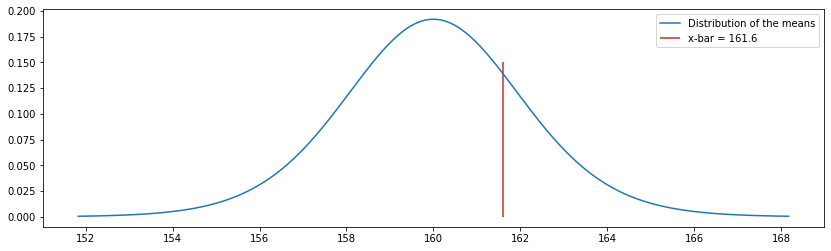

p-value =  0.2231739869382623
Do not reject H0


In [4]:
# the sample
sample = np.array([156, 170, 165, 153, 159, 174, 146, 160, 172, 157, 158, 162, 173, 159, 160])

# hypotheses
# H0: mu =  <--- always has "="
# Ha: mu    <--- our suspicion
mu0 = 160

# Get the statistics
n = sample.size
x_bar = sample.mean()
se = stats.sem(sample)

# Assuming H0 is true, this is the distribution of the averages of the heights for samples of size n
T = stats.t(df=n-1, loc = mu0, scale = se)


# Let us plot all the facts together
xs = np.linspace(mu0 - 4*se, mu0+4*se, 1000)
plt.figure(figsize=(14, 4))
plt.vlines(x_bar, 0, 0.15, color='tab:red', label=f'x-bar = {np.round(x_bar,2)}')
plt.plot(xs, T.pdf(xs), label='Distribution of the means')
plt.legend()
plt.show()


# Calculate the p-value: (x_bar, +infty)
p = 1- T.cdf(x_bar) 
print('p-value = ', p)

 #Print a simple conclusion:
if p < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

## Example 2
Bjork Larsen was trying to decide whether to use a new racing wax for cross-country skis. He decided that the wax would be worth the price if he could average less than 55 seconds on a course he knew well, so he planned to test the wax by racing on the course 8 times. His 8 times are given in the cell below. Should he buy the wax?

In [ ]:
# the sample
sample = np.array([50.3, 55.9, 50.5, 52.4, 46.5, 57.8, 52.2, 43.2])

# hypotheses
# H0: mu 
# Ha: mu 

### Example 3
The mean annual salary for a school administrator in the USA is \$90,000 a year (*The Cincinnati Enquirer*, April 7, 2012). A school official took a sample school administrators in the state of Ohio to learn about salaries in that state to see if they differed from the national average. The data is given inc the cell below. Do the salaries in Ohio **differ** from the national average?

In [ ]:
# the sample
sample = np.array([77600, 76000, 90700, 97200, 90700, 101800, 78700, 81300, 84200, 97600, 77500,
                   75700, 89400, 84300, 78700, 84600, 87700, 103400, 83800, 101300, 94700, 69200,
                   95400, 61500, 68800])


### Example 4*: what to do if we have only statistics?
In cases like these, resort to **standardization** using the following formula
\begin{equation} t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \end{equation}
and then proceed with a "standard" *t*-distribution (with the default values: `loc=0, scale=1` and `df=n-1`) and use the $t$ from the formula as the start/end of the accumulation of the $p$-value. Let's see an example.

In a cardiological study, a sample of $n = 100$ people had an average systolic blood pressure of $\bar{x}=125.1$ mm Hg with a standard deviation of $s = 21.21$ mm Hg. Is the group average BP significantly greater than the regular population? It is assumed that the “normal” systolic blood pressure is $\mu_0 = 120$ mm Hg.

In [ ]:
# statistics
n = 100
x_bar = 125.1
s = 21.21
mu0 = 120


### Comparing two means: the two sample *t*-test
Most frequently we have to compare two samples in terms of their means: do the two samples come from populations with equal means? In other words: do the two samples come from the same population, or from different populations?

The *t*-test can be adapted to work in this context. Assume we have two samples which come from two populations, with means $\mu_1$ and $\mu_2$ respectively. The hypotheses of the test are:
\begin{equation}
H_0: \mu_1 = \mu_2
\end{equation}
and
\begin{equation}
\begin{array}{rcl}
H_a: \mu_1 &\neq& \mu_2\\
H_a: \mu_1 &<& \mu_2\\
H_a: \mu_1 &>& \mu_2
\end{array}
\end{equation}

Without getting into the details of how the test manages to produce a $p$-value, we use the `scipy`'s capabilities and directly step into problem-solving.

### Example 5: 
Home values tend to increase over time under normal conditions, but the recession of 2008 and 2009 has reportedly caused the sales price of existing homes to fall accross the US. Do data support this conclusion? The cell below contains data on 30 existing home sales in 2006 and 40 existing home sales in 2009. Is there any evidence that the prices have fallen in 2009 compared to 2006?

In [ ]:
# the samples
s_2006 = np.array([213100, 226200, 239100, 214300, 161700, 181200, 228600, 222100, 228900, 235800, 
                   219400, 238800, 301800, 264200, 320200, 315000, 118900, 172400, 137500, 212800, 
                   175400, 311400, 296900, 292500, 287700, 246500, 195600, 155300, 152400, 211200])

s_2009 = np.array([155400, 189800, 200800, 280400, 213200, 181100, 117400, 130000, 170000, 149600,
                   146200, 54400, 213800, 186000, 182100, 180000, 215700, 164200, 95300, 239500,
                   207200, 188200, 169400, 185600, 177000, 178000, 161200, 249200, 146400, 99800,
                   246700, 173500, 138100, 112200, 137500, 147900, 179000, 116200, 197500, 164200])


# hypotheses
# H0: mu_2006 = mu_2009   <--- always has "="
# Ha: mu_2006 ??? mu_2009   <--- test if prices dropped in 2009

### Comparing more than two means: the One-Way ANOVA *F*-test
The One-Way ANOVA *F*-test extends the two-sample *t*-test from two to an arbitrary number of samples. If you need to test if the means of more than two samples are equal, then you should use this test.

The hypotheses are:
\begin{equation}
\begin{array}{rcl}
H_0&:& \text{all means are equal}\\
H_a&:& \text{not all means are equal}
\end{array}
\end{equation}

There are three things that you must have in mind about the One-Way ANOVA *F*-test:
* The alternative hypotheses tests for generall difference between the means, similar to the $"\neq"$ alternatives of the *t*-test
* The test assumes that the variances of the population in question are all equal
* If you end up rejecting $H_0$, then the test does not tell you which means *are* different to answer this question, you will have to run **post-hoc** tests to identify the source(s) of the difference

### Example 6
The Consumer Reports Restaurant Customer Satisfaction Survey is based upon 148,599 visits to full-service restaurant chains. One of the variables in the study is meal price, the average amount paid per person for dinner and drinks, minus the tip. Suppose a reporter for the Sun Coast Times thought that it would be of interest to her readers to conduct a similar study for restaurants located on the Grand Strand section in Myrtle Beach, South Carolina. The reporter selected a random sample of 8 seafood restaurants, 8 Italian restaurants, and 8 steakhouses. The data in the cell below show the meal prices (in dollars) obtained for the 24 restaurants sampled. Is a significant difference among the mean meal price for the three types of restaurants?

In [ ]:
# samples
italian = np.array([12, 13, 15, 17, 18, 20, 17, 24])
seafood = np.array([16, 18, 17, 26, 23, 15, 19, 18])
steakhouse = np.array([24, 19, 23, 25, 21, 22, 27, 31])


# Hypotheses
# H0: 
# Ha: 